In [1]:
!pip install pymongo

     |████████████████████████████████| 506 kB 23.2 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 241 kB 25.6 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

     |████████████████████████████████| 64 kB 732 kB/s  eta 0:00:01
     |████████████████████████████████| 146 kB 30.8 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

     |████████████████████████████████| 50 kB 8.3 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

In [8]:
client = MongoClient(mongod_connect)
db = client.lab9 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

In [13]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

In [14]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

In [15]:
search_results = rest_api.search.tweets( count=count,q=q,) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Thu Nov 04 19:03:40 +0000 2021'
'Thu Nov 04 19:03:40 +0000 2021'
'Thu Nov 04 19:03:39 +0000 2021'
'Thu Nov 04 19:03:39 +0000 2021'
'Thu Nov 04 19:03:38 +0000 2021'
'Thu Nov 04 19:03:38 +0000 2021'
'Thu Nov 04 19:03:37 +0000 2021'
'Thu Nov 04 19:03:37 +0000 2021'
'Thu Nov 04 19:03:35 +0000 2021'
'Thu Nov 04 19:03:35 +0000 2021'
'Thu Nov 04 19:03:35 +0000 2021'
'Thu Nov 04 19:03:35 +0000 2021'
'Thu Nov 04 19:03:35 +0000 2021'
'Thu Nov 04 19:03:33 +0000 2021'
'Thu Nov 04 19:03:33 +0000 2021'
'Thu Nov 04 19:03:31 +0000 2021'
'Thu Nov 04 19:03:30 +0000 2021'
'Thu Nov 04 19:03:30 +0000 2021'
'Thu Nov 04 19:03:30 +0000 2021'
'Thu Nov 04 19:03:29 +0000 2021'
'Thu Nov 04 19:03:29 +0000 2021'
'Thu Nov 04 19:03:28 +0000 2021'
'Thu Nov 04 19:03:28 +0000 2021'
'Thu Nov 04 19:03:27 +0000 2021'
'Thu Nov 04 19:03:27 +0000 2021'
'Thu Nov 04 19:03:26 +0000 2021'
'Thu Nov 04 19:03:26 +0000 2021'
'Thu Nov 04 19:03:25 +0000 2021'
'Thu Nov 04 19:03:23 +0000 2021'
'Thu Nov 04 19:03:23 +0000 2021'
'Thu Nov 0

In [16]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                         max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Thu Nov 04 19:02:41 +0000 2021'
'Thu Nov 04 19:02:41 +0000 2021'
'Thu Nov 04 19:02:41 +0000 2021'
'Thu Nov 04 19:02:40 +0000 2021'
'Thu Nov 04 19:02:40 +0000 2021'
'Thu Nov 04 19:02:40 +0000 2021'
'Thu Nov 04 19:02:40 +0000 2021'
'Thu Nov 04 19:02:40 +0000 2021'
'Thu Nov 04 19:02:39 +0000 2021'
'Thu Nov 04 19:02:39 +0000 2021'
'Thu Nov 04 19:02:39 +0000 2021'
'Thu Nov 04 19:02:38 +0000 2021'
'Thu Nov 04 19:02:38 +0000 2021'
'Thu Nov 04 19:02:38 +0000 2021'
'Thu Nov 04 19:02:38 +0000 2021'
'Thu Nov 04 19:02:37 +0000 2021'
'Thu Nov 04 19:02:36 +0000 2021'
'Thu Nov 04 19:02:35 +0000 2021'
'Thu Nov 04 19:02:35 +0000 2021'
'Thu Nov 04 19:02:34 +0000 2021'
'Thu Nov 04 19:02:34 +0000 2021'
'Thu Nov 04 19:02:33 +0000 2021'
'Thu Nov 04 19:02:33 +0000 2021'
'Thu Nov 04 19:02:32 +0000 2021'
'Thu Nov 04 19:02:32 +0000 2021'
'Thu Nov 04 19:02:32 +0000 2021'
'Thu Nov 04 19:02:31 +0000 2021'
'Thu Nov 04 19:02:31 +0000 2021'
'Thu Nov 04 19:02:30 +0000 2021'
'Thu Nov 04 19:02:30 +0000 2021'
'Thu Nov 0

'Thu Nov 04 19:00:40 +0000 2021'
'Thu Nov 04 19:00:39 +0000 2021'
'Thu Nov 04 19:00:39 +0000 2021'
'Thu Nov 04 19:00:39 +0000 2021'
'Thu Nov 04 19:00:39 +0000 2021'
'Thu Nov 04 19:00:39 +0000 2021'
'Thu Nov 04 19:00:38 +0000 2021'
'Thu Nov 04 19:00:38 +0000 2021'
'Thu Nov 04 19:00:37 +0000 2021'
'Thu Nov 04 19:00:36 +0000 2021'
'Thu Nov 04 19:00:36 +0000 2021'
'Thu Nov 04 19:00:35 +0000 2021'
'Thu Nov 04 19:00:35 +0000 2021'
'Thu Nov 04 19:00:35 +0000 2021'
'Thu Nov 04 19:00:34 +0000 2021'
'Thu Nov 04 19:00:34 +0000 2021'
'Thu Nov 04 19:00:33 +0000 2021'
'Thu Nov 04 19:00:33 +0000 2021'
'Thu Nov 04 19:00:33 +0000 2021'
'Thu Nov 04 19:00:33 +0000 2021'
'Thu Nov 04 19:00:32 +0000 2021'
'Thu Nov 04 19:00:32 +0000 2021'
'Thu Nov 04 19:00:31 +0000 2021'
'Thu Nov 04 19:00:31 +0000 2021'
'Thu Nov 04 19:00:31 +0000 2021'
'Thu Nov 04 19:00:31 +0000 2021'
'Thu Nov 04 19:00:29 +0000 2021'
'Thu Nov 04 19:00:28 +0000 2021'
'Thu Nov 04 19:00:28 +0000 2021'
'Thu Nov 04 19:00:28 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:59:12 +0000 2021'
'Thu Nov 04 18:59:10 +0000 2021'
'Thu Nov 04 18:59:09 +0000 2021'
'Thu Nov 04 18:59:09 +0000 2021'
'Thu Nov 04 18:59:08 +0000 2021'
'Thu Nov 04 18:59:08 +0000 2021'
'Thu Nov 04 18:59:07 +0000 2021'
'Thu Nov 04 18:59:06 +0000 2021'
'Thu Nov 04 18:59:06 +0000 2021'
'Thu Nov 04 18:59:04 +0000 2021'
'Thu Nov 04 18:59:04 +0000 2021'
'Thu Nov 04 18:59:04 +0000 2021'
'Thu Nov 04 18:59:04 +0000 2021'
'Thu Nov 04 18:59:02 +0000 2021'
'Thu Nov 04 18:59:01 +0000 2021'
'Thu Nov 04 18:59:00 +0000 2021'
'Thu Nov 04 18:59:00 +0000 2021'
'Thu Nov 04 18:58:59 +0000 2021'
'Thu Nov 04 18:58:59 +0000 2021'
'Thu Nov 04 18:58:59 +0000 2021'
'Thu Nov 04 18:58:59 +0000 2021'
'Thu Nov 04 18:58:58 +0000 2021'
'Thu Nov 04 18:58:58 +0000 2021'
'Thu Nov 04 18:58:57 +0000 2021'
'Thu Nov 04 18:58:56 +0000 2021'
'Thu Nov 04 18:58:54 +0000 2021'
'Thu Nov 04 18:58:54 +0000 2021'
'Thu Nov 04 18:58:52 +0000 2021'
'Thu Nov 04 18:58:52 +0000 2021'
'Thu Nov 04 18:58:52 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:56:39 +0000 2021'
'Thu Nov 04 18:56:39 +0000 2021'
'Thu Nov 04 18:56:39 +0000 2021'
'Thu Nov 04 18:56:39 +0000 2021'
'Thu Nov 04 18:56:38 +0000 2021'
'Thu Nov 04 18:56:38 +0000 2021'
'Thu Nov 04 18:56:38 +0000 2021'
'Thu Nov 04 18:56:38 +0000 2021'
'Thu Nov 04 18:56:38 +0000 2021'
'Thu Nov 04 18:56:37 +0000 2021'
'Thu Nov 04 18:56:37 +0000 2021'
'Thu Nov 04 18:56:36 +0000 2021'
'Thu Nov 04 18:56:36 +0000 2021'
'Thu Nov 04 18:56:35 +0000 2021'
'Thu Nov 04 18:56:35 +0000 2021'
'Thu Nov 04 18:56:35 +0000 2021'
'Thu Nov 04 18:56:34 +0000 2021'
'Thu Nov 04 18:56:32 +0000 2021'
'Thu Nov 04 18:56:31 +0000 2021'
'Thu Nov 04 18:56:31 +0000 2021'
'Thu Nov 04 18:56:30 +0000 2021'
'Thu Nov 04 18:56:30 +0000 2021'
'Thu Nov 04 18:56:29 +0000 2021'
'Thu Nov 04 18:56:29 +0000 2021'
'Thu Nov 04 18:56:29 +0000 2021'
'Thu Nov 04 18:56:28 +0000 2021'
'Thu Nov 04 18:56:28 +0000 2021'
'Thu Nov 04 18:56:28 +0000 2021'
'Thu Nov 04 18:56:27 +0000 2021'
'Thu Nov 04 18:56:27 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:54:36 +0000 2021'
'Thu Nov 04 18:54:35 +0000 2021'
'Thu Nov 04 18:54:34 +0000 2021'
'Thu Nov 04 18:54:34 +0000 2021'
'Thu Nov 04 18:54:34 +0000 2021'
'Thu Nov 04 18:54:34 +0000 2021'
'Thu Nov 04 18:54:33 +0000 2021'
'Thu Nov 04 18:54:33 +0000 2021'
'Thu Nov 04 18:54:32 +0000 2021'
'Thu Nov 04 18:54:31 +0000 2021'
'Thu Nov 04 18:54:30 +0000 2021'
'Thu Nov 04 18:54:29 +0000 2021'
'Thu Nov 04 18:54:29 +0000 2021'
'Thu Nov 04 18:54:29 +0000 2021'
'Thu Nov 04 18:54:28 +0000 2021'
'Thu Nov 04 18:54:27 +0000 2021'
'Thu Nov 04 18:54:27 +0000 2021'
'Thu Nov 04 18:54:27 +0000 2021'
'Thu Nov 04 18:54:26 +0000 2021'
'Thu Nov 04 18:54:26 +0000 2021'
'Thu Nov 04 18:54:25 +0000 2021'
'Thu Nov 04 18:54:25 +0000 2021'
'Thu Nov 04 18:54:25 +0000 2021'
'Thu Nov 04 18:54:23 +0000 2021'
'Thu Nov 04 18:54:23 +0000 2021'
'Thu Nov 04 18:54:23 +0000 2021'
'Thu Nov 04 18:54:23 +0000 2021'
'Thu Nov 04 18:54:23 +0000 2021'
'Thu Nov 04 18:54:21 +0000 2021'
'Thu Nov 04 18:54:20 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:52:18 +0000 2021'
'Thu Nov 04 18:52:17 +0000 2021'
'Thu Nov 04 18:52:17 +0000 2021'
'Thu Nov 04 18:52:16 +0000 2021'
'Thu Nov 04 18:52:16 +0000 2021'
'Thu Nov 04 18:52:15 +0000 2021'
'Thu Nov 04 18:52:15 +0000 2021'
'Thu Nov 04 18:52:13 +0000 2021'
'Thu Nov 04 18:52:13 +0000 2021'
'Thu Nov 04 18:52:13 +0000 2021'
'Thu Nov 04 18:52:13 +0000 2021'
'Thu Nov 04 18:52:12 +0000 2021'
'Thu Nov 04 18:52:12 +0000 2021'
'Thu Nov 04 18:52:11 +0000 2021'
'Thu Nov 04 18:52:10 +0000 2021'
'Thu Nov 04 18:52:10 +0000 2021'
'Thu Nov 04 18:52:10 +0000 2021'
'Thu Nov 04 18:52:09 +0000 2021'
'Thu Nov 04 18:52:09 +0000 2021'
'Thu Nov 04 18:52:09 +0000 2021'
'Thu Nov 04 18:52:08 +0000 2021'
'Thu Nov 04 18:52:07 +0000 2021'
'Thu Nov 04 18:52:07 +0000 2021'
'Thu Nov 04 18:52:06 +0000 2021'
'Thu Nov 04 18:52:06 +0000 2021'
'Thu Nov 04 18:52:05 +0000 2021'
'Thu Nov 04 18:52:05 +0000 2021'
'Thu Nov 04 18:52:05 +0000 2021'
'Thu Nov 04 18:52:04 +0000 2021'
'Thu Nov 04 18:52:03 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:50:06 +0000 2021'
'Thu Nov 04 18:50:06 +0000 2021'
'Thu Nov 04 18:50:06 +0000 2021'
'Thu Nov 04 18:50:06 +0000 2021'
'Thu Nov 04 18:50:05 +0000 2021'
'Thu Nov 04 18:50:05 +0000 2021'
'Thu Nov 04 18:50:05 +0000 2021'
'Thu Nov 04 18:50:05 +0000 2021'
'Thu Nov 04 18:50:05 +0000 2021'
'Thu Nov 04 18:50:05 +0000 2021'
'Thu Nov 04 18:50:04 +0000 2021'
'Thu Nov 04 18:50:04 +0000 2021'
'Thu Nov 04 18:50:04 +0000 2021'
'Thu Nov 04 18:50:03 +0000 2021'
'Thu Nov 04 18:50:03 +0000 2021'
'Thu Nov 04 18:50:03 +0000 2021'
'Thu Nov 04 18:50:02 +0000 2021'
'Thu Nov 04 18:50:02 +0000 2021'
'Thu Nov 04 18:50:02 +0000 2021'
'Thu Nov 04 18:50:00 +0000 2021'
'Thu Nov 04 18:50:00 +0000 2021'
'Thu Nov 04 18:50:00 +0000 2021'
'Thu Nov 04 18:50:00 +0000 2021'
'Thu Nov 04 18:50:00 +0000 2021'
'Thu Nov 04 18:50:00 +0000 2021'
'Thu Nov 04 18:49:59 +0000 2021'
'Thu Nov 04 18:49:59 +0000 2021'
'Thu Nov 04 18:49:57 +0000 2021'
'Thu Nov 04 18:49:56 +0000 2021'
'Thu Nov 04 18:49:56 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:47:54 +0000 2021'
'Thu Nov 04 18:47:53 +0000 2021'
'Thu Nov 04 18:47:53 +0000 2021'
'Thu Nov 04 18:47:53 +0000 2021'
'Thu Nov 04 18:47:53 +0000 2021'
'Thu Nov 04 18:47:52 +0000 2021'
'Thu Nov 04 18:47:52 +0000 2021'
'Thu Nov 04 18:47:51 +0000 2021'
'Thu Nov 04 18:47:51 +0000 2021'
'Thu Nov 04 18:47:51 +0000 2021'
'Thu Nov 04 18:47:49 +0000 2021'
'Thu Nov 04 18:47:49 +0000 2021'
'Thu Nov 04 18:47:49 +0000 2021'
'Thu Nov 04 18:47:46 +0000 2021'
'Thu Nov 04 18:47:45 +0000 2021'
'Thu Nov 04 18:47:43 +0000 2021'
'Thu Nov 04 18:47:41 +0000 2021'
'Thu Nov 04 18:47:41 +0000 2021'
'Thu Nov 04 18:47:40 +0000 2021'
'Thu Nov 04 18:47:39 +0000 2021'
'Thu Nov 04 18:47:39 +0000 2021'
'Thu Nov 04 18:47:38 +0000 2021'
'Thu Nov 04 18:47:38 +0000 2021'
'Thu Nov 04 18:47:38 +0000 2021'
'Thu Nov 04 18:47:37 +0000 2021'
'Thu Nov 04 18:47:36 +0000 2021'
'Thu Nov 04 18:47:35 +0000 2021'
'Thu Nov 04 18:47:34 +0000 2021'
'Thu Nov 04 18:47:34 +0000 2021'
'Thu Nov 04 18:47:34 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:45:37 +0000 2021'
'Thu Nov 04 18:45:37 +0000 2021'
'Thu Nov 04 18:45:36 +0000 2021'
'Thu Nov 04 18:45:35 +0000 2021'
'Thu Nov 04 18:45:35 +0000 2021'
'Thu Nov 04 18:45:34 +0000 2021'
'Thu Nov 04 18:45:34 +0000 2021'
'Thu Nov 04 18:45:32 +0000 2021'
'Thu Nov 04 18:45:31 +0000 2021'
'Thu Nov 04 18:45:30 +0000 2021'
'Thu Nov 04 18:45:30 +0000 2021'
'Thu Nov 04 18:45:29 +0000 2021'
'Thu Nov 04 18:45:29 +0000 2021'
'Thu Nov 04 18:45:28 +0000 2021'
'Thu Nov 04 18:45:28 +0000 2021'
'Thu Nov 04 18:45:28 +0000 2021'
'Thu Nov 04 18:45:27 +0000 2021'
'Thu Nov 04 18:45:27 +0000 2021'
'Thu Nov 04 18:45:27 +0000 2021'
'Thu Nov 04 18:45:27 +0000 2021'
'Thu Nov 04 18:45:26 +0000 2021'
'Thu Nov 04 18:45:26 +0000 2021'
'Thu Nov 04 18:45:25 +0000 2021'
'Thu Nov 04 18:45:25 +0000 2021'
'Thu Nov 04 18:45:25 +0000 2021'
'Thu Nov 04 18:45:25 +0000 2021'
'Thu Nov 04 18:45:25 +0000 2021'
'Thu Nov 04 18:45:24 +0000 2021'
'Thu Nov 04 18:45:23 +0000 2021'
'Thu Nov 04 18:45:23 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:43:38 +0000 2021'
'Thu Nov 04 18:43:36 +0000 2021'
'Thu Nov 04 18:43:36 +0000 2021'
'Thu Nov 04 18:43:34 +0000 2021'
'Thu Nov 04 18:43:34 +0000 2021'
'Thu Nov 04 18:43:34 +0000 2021'
'Thu Nov 04 18:43:34 +0000 2021'
'Thu Nov 04 18:43:33 +0000 2021'
'Thu Nov 04 18:43:33 +0000 2021'
'Thu Nov 04 18:43:33 +0000 2021'
'Thu Nov 04 18:43:33 +0000 2021'
'Thu Nov 04 18:43:33 +0000 2021'
'Thu Nov 04 18:43:33 +0000 2021'
'Thu Nov 04 18:43:33 +0000 2021'
'Thu Nov 04 18:43:33 +0000 2021'
'Thu Nov 04 18:43:30 +0000 2021'
'Thu Nov 04 18:43:30 +0000 2021'
'Thu Nov 04 18:43:29 +0000 2021'
'Thu Nov 04 18:43:29 +0000 2021'
'Thu Nov 04 18:43:26 +0000 2021'
'Thu Nov 04 18:43:26 +0000 2021'
'Thu Nov 04 18:43:25 +0000 2021'
'Thu Nov 04 18:43:25 +0000 2021'
'Thu Nov 04 18:43:24 +0000 2021'
'Thu Nov 04 18:43:24 +0000 2021'
'Thu Nov 04 18:43:24 +0000 2021'
'Thu Nov 04 18:43:23 +0000 2021'
'Thu Nov 04 18:43:22 +0000 2021'
'Thu Nov 04 18:43:22 +0000 2021'
'Thu Nov 04 18:43:19 +0000 2021'
'Thu Nov 0

TwitterHTTPError: Twitter sent status 429 for URL: 1.1/search/tweets.json using parameters: (count=100&max_id=1456331192274407428&oauth_consumer_key=uHvizo6EmsBOVBzm5Rda1PlrT&oauth_nonce=4206609593077755481&oauth_signature_method=HMAC-SHA1&oauth_timestamp=1636053323&oauth_token=60388598-MNOLnSnLK8ZJwWh2isDw0ojr0NXqc57nmNJ4ML4Z4&oauth_version=1.0&q=covid19&oauth_signature=uUvrU8tRgtYXCZecwU%2B8gFCv%2Fmk%3D)
details: {'errors': [{'message': 'Rate limit exceeded', 'code': 88}]}

In [17]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users

2476
2139


In [18]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index

'text_index'

In [19]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid"}}) # return tweets contain vote

In [20]:
for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: CBS 58 News
text: RT @DHSWI: Here is today's snapshot of COVID-19 in Wisconsin. Your best defense against the virus is the COVID-19 vaccine. Vaccines are ava…
----
name: Mrs.H. 💙 #MaskUp 😷
text: RT @DHSWI: Here is today's snapshot of COVID-19 in Wisconsin. Your best defense against the virus is the COVID-19 vaccine. Vaccines are ava…
----
name: Dr. Rachel Roper
text: We will have as much COVID as measles as soon as everyone gets vaccinated for COVID as much as they have gotten vac… https://t.co/BPTlZ4VMRR
----
name: WIDeptHealthServices
text: Here is today's snapshot of COVID-19 in Wisconsin. Your best defense against the virus is the COVID-19 vaccine. Vac… https://t.co/PgDWIHqFlw
----
name: Gary McFarlane
text: When are masks most useful? COVID cases offer hints - Participants exposed to someone with COVID-19 had lower odds… https://t.co/UO20lh7kMR
----
name: B S Bedi
text: RT @yooelre: Merck's Covid pill approved by UK regulator, #COVID19
An antiviral pill found to be effe

In [22]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vaccine"}}) # return tweets contain vote

In [23]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,favorited,retweeted,lang,retweeted_status,quoted_status_id,quoted_status_id_str,possibly_sensitive,extended_entities,quoted_status,withheld_in_countries
0,6184311fccb8191a66c559ba,Thu Nov 04 19:00:34 +0000 2021,1456335582620160007,1456335582620160007,@_evelynrae Covid Vaccines are safe. Billions ...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.455821e+18,...,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,61843137ccb8191a66c55df2,Thu Nov 04 18:51:46 +0000 2021,1456333366693961731,1456333366693961731,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,False,False,en,{'created_at': 'Wed Nov 03 18:30:11 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN
2,61843126ccb8191a66c55adc,Thu Nov 04 18:58:46 +0000 2021,1456335125734731778,1456335125734731778,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,en,{'created_at': 'Wed Nov 03 18:30:11 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN
3,61843139ccb8191a66c55e4f,Thu Nov 04 18:50:59 +0000 2021,1456333170727587841,1456333170727587841,RT @EpochTimes: The #CDC altered the definitio...,False,"{'hashtags': [{'text': 'CDC', 'indices': [20, ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,en,{'created_at': 'Thu Nov 04 17:10:00 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN
4,6184312dccb8191a66c55c2d,Thu Nov 04 18:55:47 +0000 2021,1456334378292989964,1456334378292989964,"@soledadobrien Question: ""Are you vaccinated a...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.456061e+18,...,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,61843133ccb8191a66c55d4f,Thu Nov 04 18:53:14 +0000 2021,1456333733519372294,1456333733519372294,RT @Thompson_2017: MEP Christine ANDERSON spea...,False,"{'hashtags': [{'text': 'Covid19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,False,False,en,{'created_at': 'Thu Nov 04 17:58:27 +0000 2021...,1.456173e+18,1456173087792189441,False,NaN,NaN,NaN
6,61843138ccb8191a66c55e43,Thu Nov 04 18:51:05 +0000 2021,1456333193070747650,1456333193070747650,@MarieMarchi Pfizer demande d’espacer de 15 jo...,False,"{'hashtags': [{'text': 'Vidal', 'indices': [68...","{'iso_language_code': 'fr', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.456299e+18,...,False,False,fr,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,61843134ccb8191a66c55d6c,Thu Nov 04 18:53:03 +0000 2021,1456333687306469379,1456333687306469379,RT @CDCgov: Parents and Caregivers: CDC recomm...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,False,False,en,{'created_at': 'Wed Nov 03 19:25:19 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN
8,61843121ccb8191a66c55a05,Thu Nov 04 19:00:11 +0000 2021,1456335482460114970,1456335482460114970,RT @KlynchStuff: Raw vaccine data can be very ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,en,{'created_at': 'Thu Nov 04 18:43:57 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN
9,6184311dccb8191a66c55954,Thu Nov 04 19:01:17 +0000 2021,1456335761876258836,1456335761876258836,RT @WHO: When a #COVID19 vaccine becomes avail...,False,"

<AxesSubplot:>

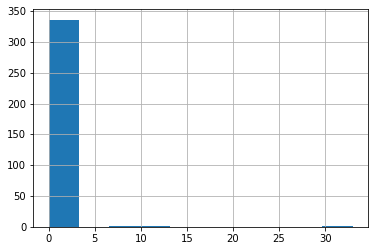

In [24]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count